In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('titanic_data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [4]:
dict_sex={
    'male':0,
    'female':1
}
dict_servive={
    0:"died",
    1:"survive"
}

In [5]:
data['BiSex']=data['Sex'].apply(lambda x:dict_sex[x])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BiSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [6]:
features=data[['Pclass','BiSex']].to_numpy()
label=data['Survived']

## functions

In [7]:
def sigmoid(x,derivative=False):
    if derivative:
        f = 1/(1+np.exp(-x)) * (1 - 1/(1+np.exp(-x)))
    else:
        f = 1/(1+np.exp(-x))
    return f
def Relu(x,derivative=False):
    if derivative:
        f=np.heaviside(x,1)
    else:
        f=np.maximum(0,x)
    return f

In [8]:
from sklearn.model_selection import train_test_split # type: ignore
xtrain,xtest,ytrain,ytest=train_test_split(features,label,test_size=0.30,random_state=0)
xtrain.shape

(623, 2)

In [9]:
xtrain[0].shape

(2,)

In [10]:
w2=2*np.random.rand(4,4)
w2

array([[1.25050562, 0.69989382, 1.55250335, 0.49144006],
       [0.81243468, 0.63461821, 0.5208199 , 1.75260947],
       [0.39058013, 1.06682071, 0.87078065, 1.11501248],
       [1.84519728, 1.3914766 , 0.05418367, 1.14045224]])

In [11]:
def ANN_forTitanic(xtrain, ytrain, h1_units=8, h2_units=8, learning_rate=0.015):
    # Initialize weights with proper dimensions
    np.random.seed(101)
    w1 = np.random.randn(h1_units, xtrain.shape[1]) * 0.01
    b1 = np.zeros((h1_units, 1))
    
    w2 = np.random.randn(h2_units, h1_units) * 0.01
    b2 = np.zeros((h2_units, 1))
    
    w_out = np.random.randn(1, h2_units) * 0.01
    b_out = np.zeros((1, 1))
    
    loss = []
    vec_y=[]
    # Convert ytrain to numpy array to avoid pandas indexing issues
    ytrain_values = ytrain.values if hasattr(ytrain, 'values') else np.array(ytrain)
    
    # Use enumerate to get both index and value
    for i, x in enumerate(xtrain):
        # Forward pass
        x = x.reshape(-1, 1)  # Convert to column vector
        z1 = np.dot(w1, x) + b1
        h1 = Relu(z1)
        
        z2 = np.dot(w2, h1) + b2
        h2 = Relu(z2)
        
        z_out = np.dot(w_out, h2) + b_out
        y = sigmoid(z_out)
        
        # Backward pass
        delta_out = (y - ytrain_values[i]) * sigmoid(z_out, derivative=True)
        
        delta_h2 = np.dot(w_out.T, delta_out) * Relu(z2, derivative=True)
        delta_h1 = np.dot(w2.T, delta_h2) * Relu(z1, derivative=True)
        
        # Update weights
        w_out -= learning_rate * np.dot(delta_out, h2.T)
        b_out -= learning_rate * delta_out
        
        w2 -= learning_rate * np.dot(delta_h2, h1.T)
        b2 -= learning_rate * delta_h2
        
        w1 -= learning_rate * np.dot(delta_h1, x.T)
        b1 -= learning_rate * delta_h1
        
        # Compute loss
        loss.append((y - ytrain_values[i])**2)
        vec_y.append(y[0])
    batc_loss=[]
    for i in range(1,10):
        loss_avg=0
        for m in range(0,60):
            loss_avg+=vec_y[60*i+m]/60
        batc_loss.append(loss_avg)
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(1,len(batc_loss)+1),batc_loss)
    plt.title("Average loss by epoch")
    plt.xlabel("Epoch")
    plt.ylabel("error")
    plt.show()

    return w1, b1, w2, b2, w_out, b_out, loss

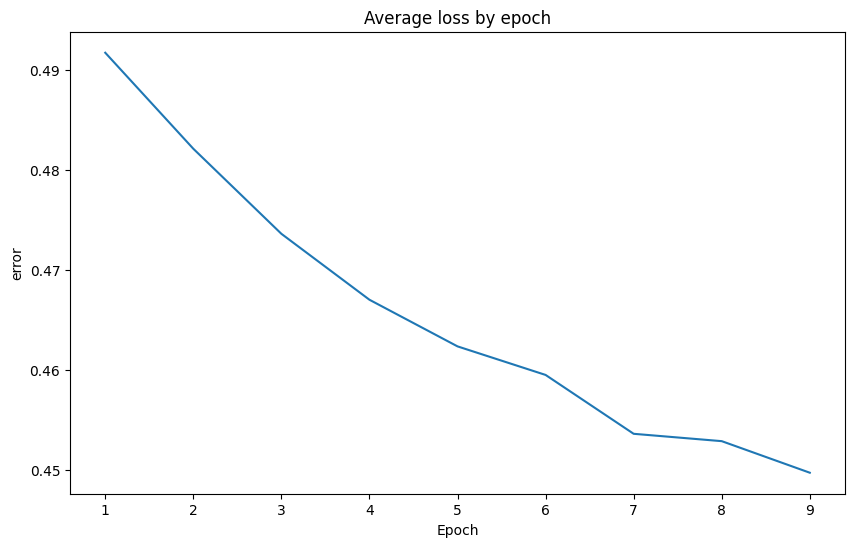

In [12]:
w1,b1,w2,b2,w_out,b_out,loss=ANN_forTitanic(xtrain,ytrain)

In [13]:
def ANN_predict(w1,b1,w2,b2,w_out,b_out,loss):
    pred=[]
    for i in range(0,xtest.shape[0]):
        x=xtest[i].reshape(-1, 1)
        z1=Relu(np.dot(w1,x)+b1)
        z2=Relu(np.dot(w2,z1)+b2)
        y=sigmoid(np.dot(w_out,z2)+b_out)
        pred.append(np.heaviside(y-0.5,1)[0])
    return np.array(pred)

In [14]:
predictions=ANN_predict(w1,b1,w2,b2,w_out,b_out,loss)
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,predictions)
df_cm=pd.DataFrame(cm,index=[dict_servive[i] for i in range(0,2)],columns=[dict_servive[i] for i in range(0,2)])
df_cm

,died,survive
died,168,0
survive,100,0


In [16]:
accuracy_score(predictions,ytest)

0.6268656716417911

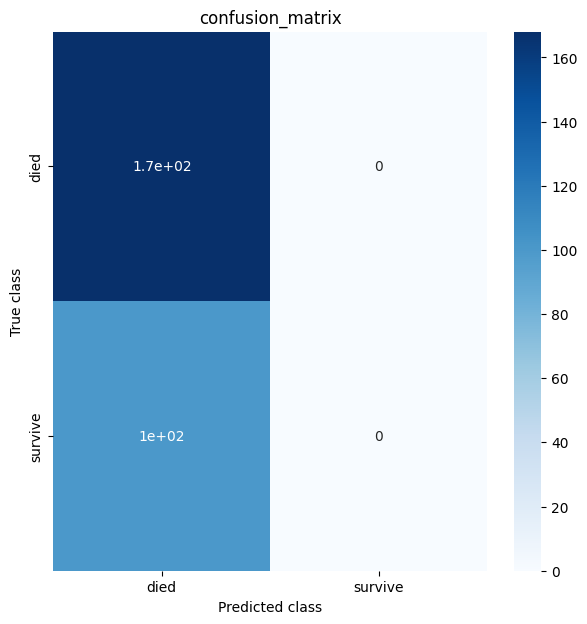

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(df_cm,annot=True,cmap='Blues')
plt.title("confusion_matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()